# Importing Libraries

In [42]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import os

# 1.Importing Dataframe

In [2]:
# Setting Variables
path = r'C:\Users\Saikat Halder\Documents\CareerFoundry\Data Immersion\Achievement 6\World Happiness Report Analysis 03202024'

# Importing Merged and Cleaned Dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','WHS_merged_clean.pkl'))

## Verifying Dataframes

In [4]:
df_merged.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [5]:
df_merged.shape

(1367, 10)

# 2. Numerical variables suitable for exploring correlation

In [6]:
# Getting a List of Columns
df_merged.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [ ]:
# 

## Create Numeric Subset used for Correlation Heatmap

In [8]:
# Creating a Numerical Subset
sub_numerical = df_merged[['happiness_score', 'gdp_per_capita','social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity','perceptions_of_corruption']]

In [9]:
# Verifying the sub_numerical
sub_numerical.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


# Correlation Heatmap

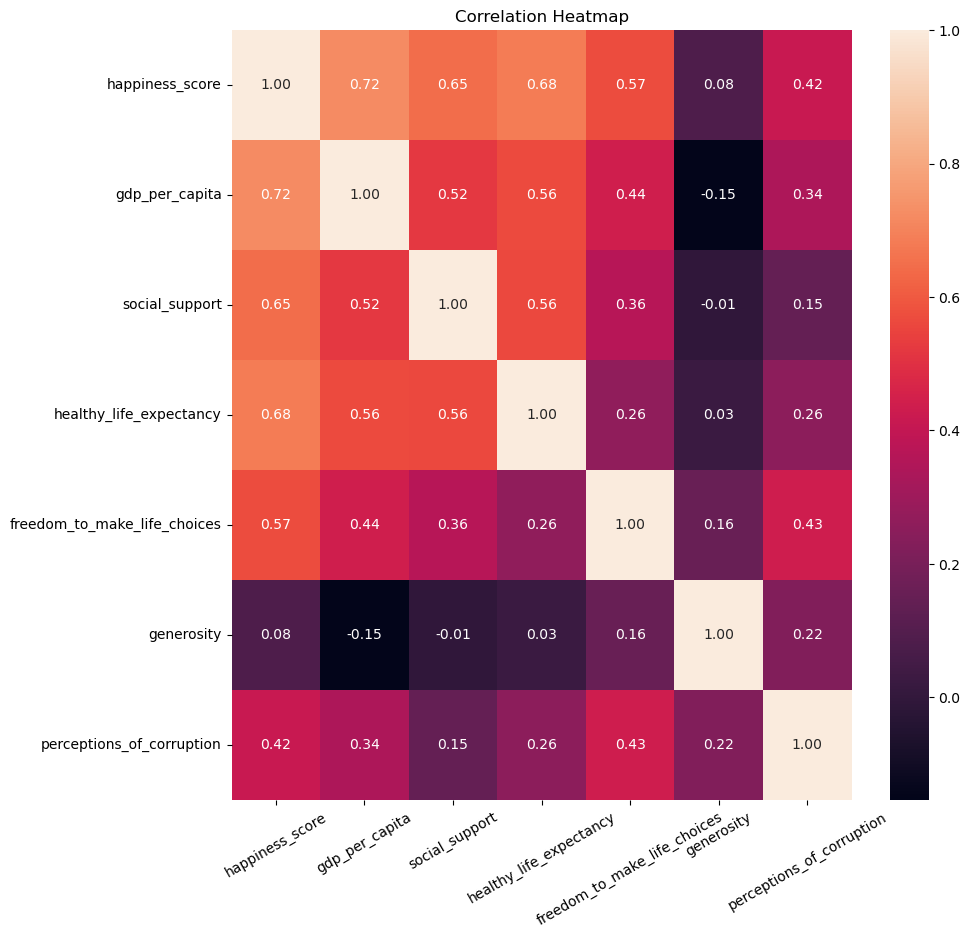

In [10]:
# Create a new figure
plt.figure(figsize=(10, 10))

# Create the correlation heatmap in seaborn
corr_heatmap_num = sub_numerical.corr()
sns.heatmap(corr_heatmap_num, annot=True, fmt = ".2f") # Values are formatted to two decimal places

# Set the title of the plot
plt.title('Correlation Heatmap')
# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_num.png'), bbox_inches='tight')

# Display the plot
plt.show()

#### hapiness_score is strongly positively correlated with the following rank
1. gdp(0.72)
2. healthy life expentency(0.68)
3. social support(.65)
4. freedom of choice(0.57)
#### Generosity has a very weak correlation with happiness score with a correlation coefficient of 0.08
#### With a correlation coefficient of 0.52, there is a positive correlation between gdp and social support
#### With a correlation coefficient of 0.56, there is a strong positive correlation between gdp and healthy life expectancy

# 4. Scatterplot 

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


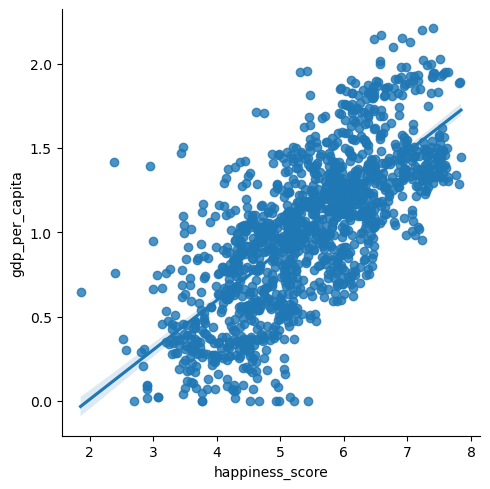

In [11]:
# Create a scatterplot for the "happiness_score" and "gdp_per_capita" columns
sns.lmplot(x = 'happiness_score', y = 'gdp_per_capita', data = df_merged)

#### The scatterplot suggests that there is a very strong positive correlation between happiness_score and gdp_per_capita with very few outliers

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


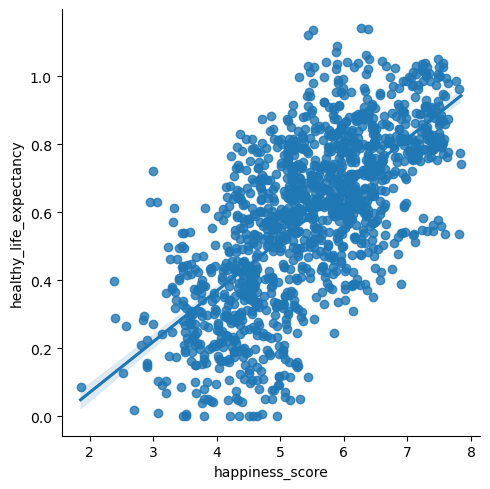

In [12]:
# Create a scatterplot for the "Base MSRP" and "healthy_life_expectancy" columns
sns.lmplot(x = 'happiness_score', y = 'healthy_life_expectancy', data = df_merged)

#### Although it is more scattered than the previous scatterplot, it, nonetheless, suggessts that there is a very strong positive correlation between happiness_score and healthy_life_expentency with very few outliers

# 5. Pair Plots

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

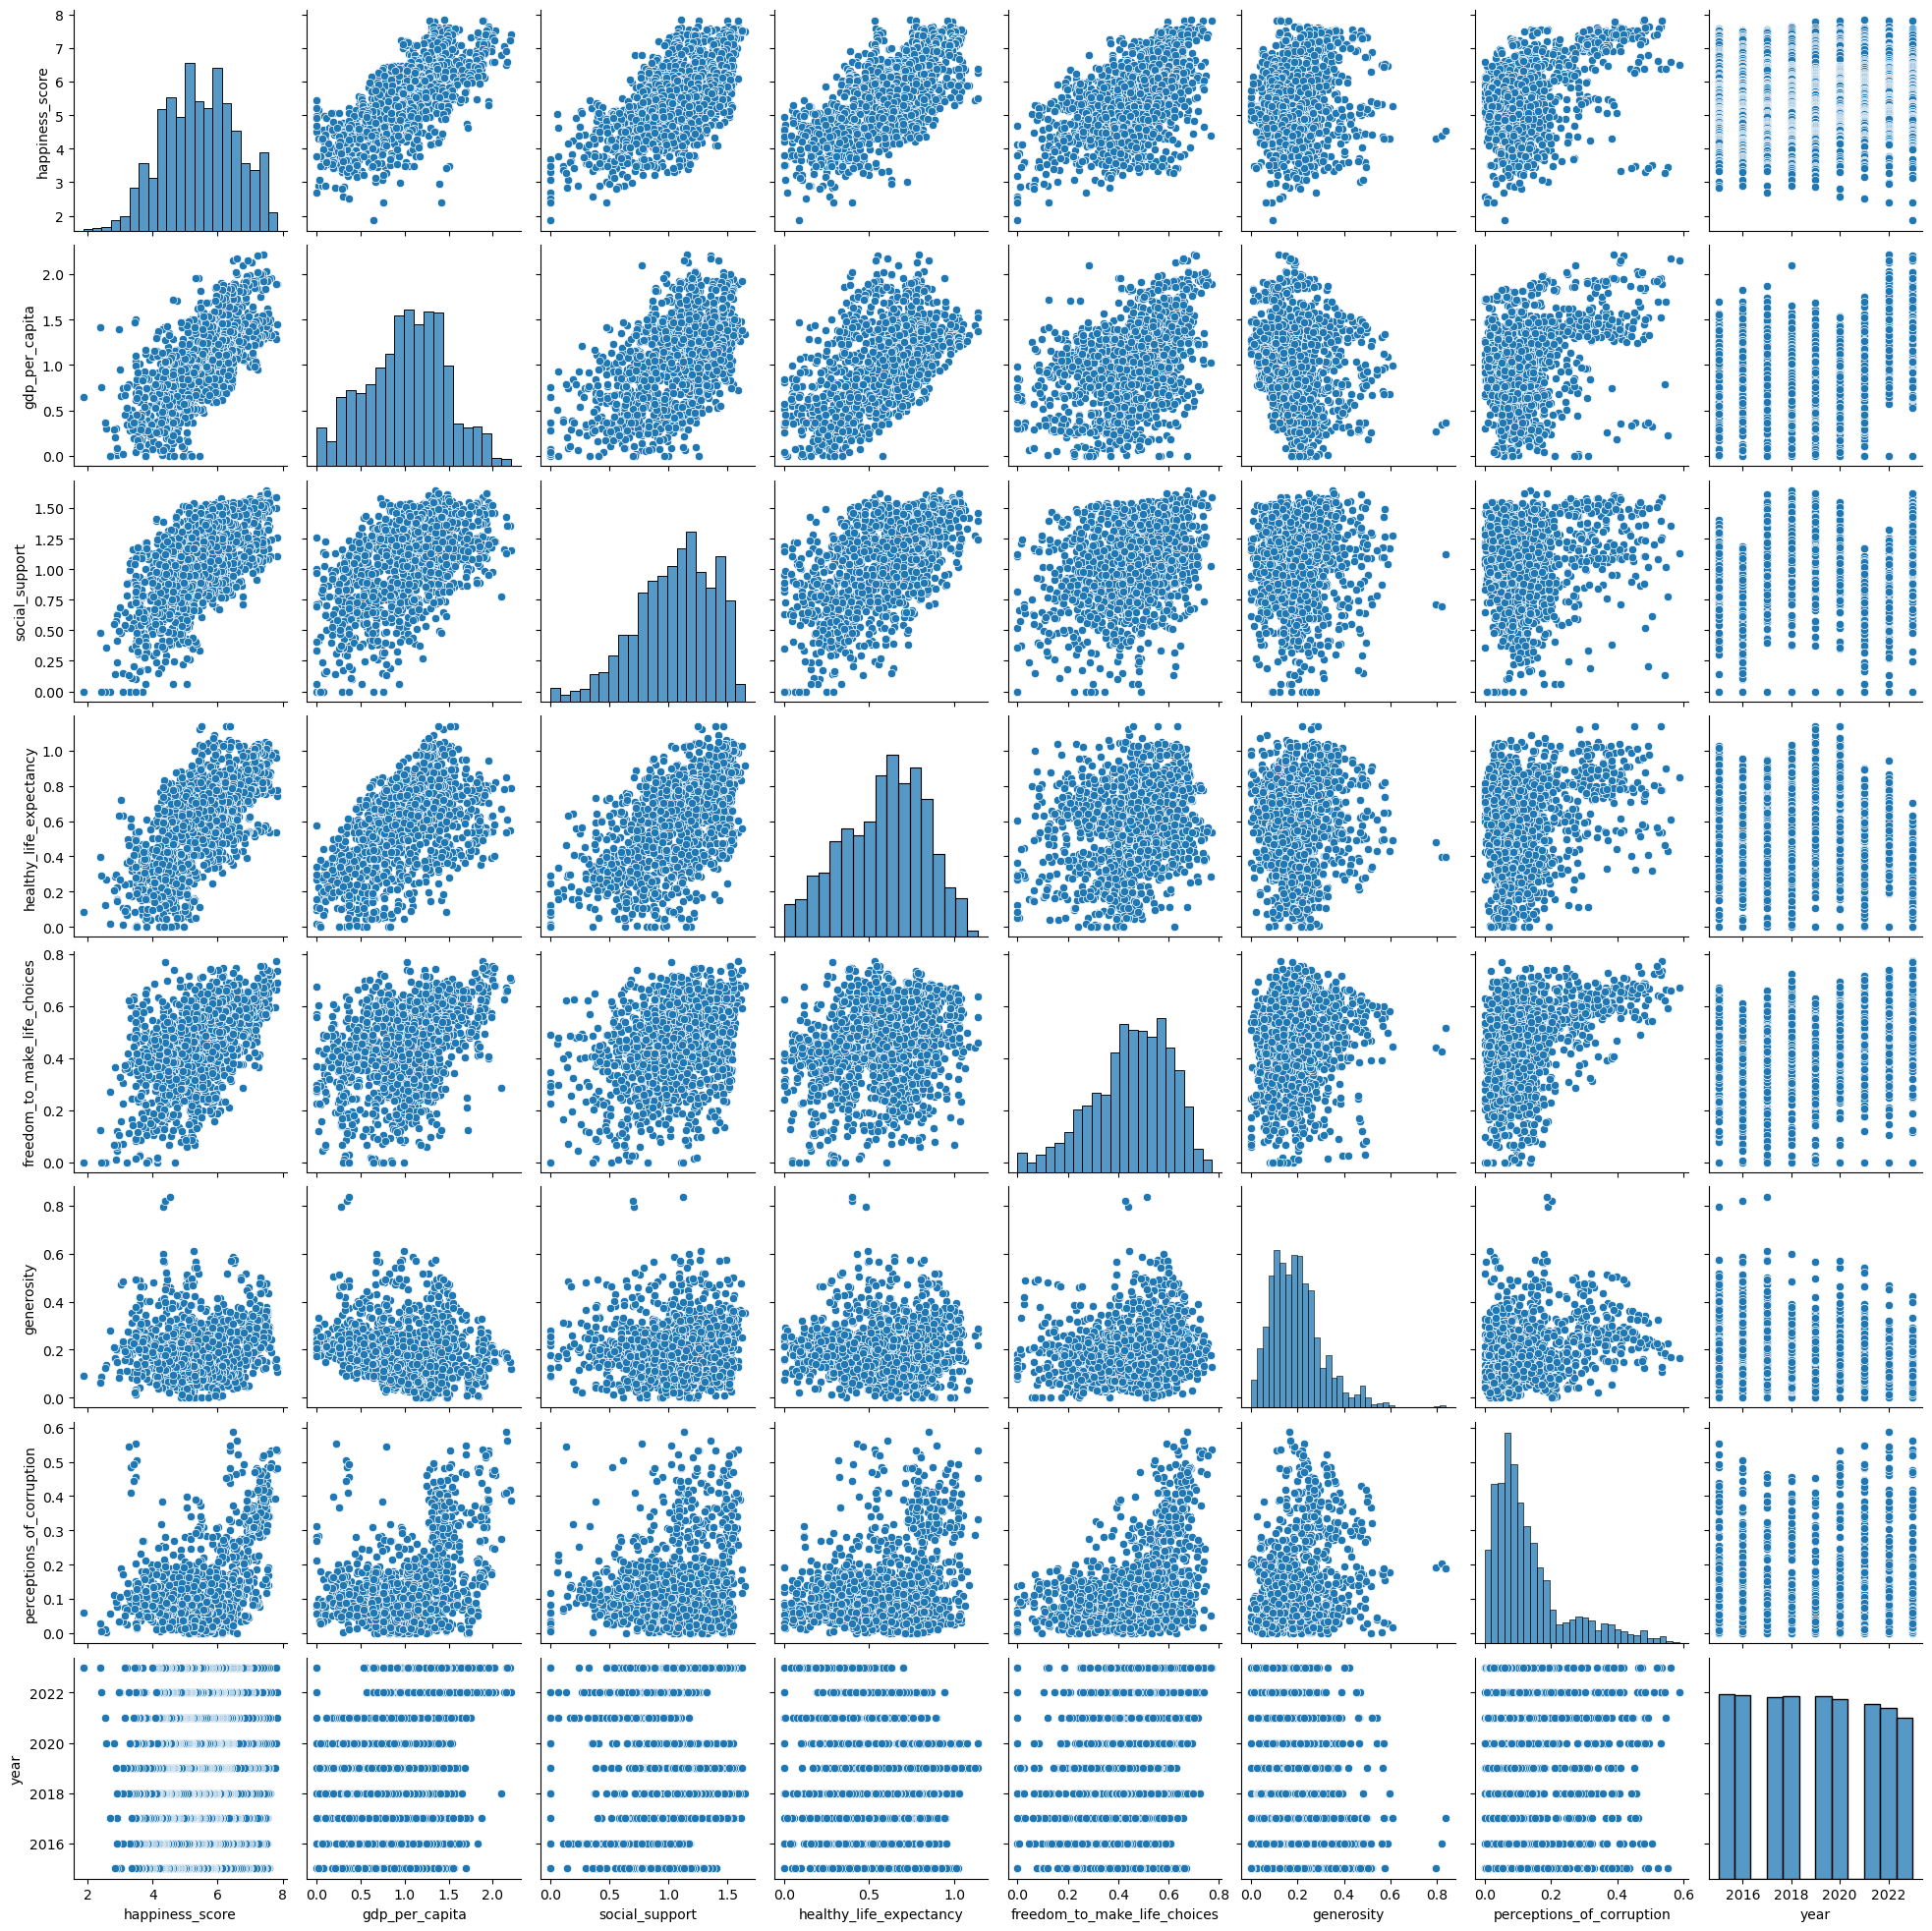

In [13]:
# Create a pair plot
g = sns.pairplot(df_merged)

#### If we are considering Happiness Score, all the variables have strong positive correlation except for generosity and perception of corruption as the plots are more scattered.
#### We can also see, there is a relationship between gdp and healthy life expentency which confirms our finding from the correlation heat map

# 6. Categorical Plots

In [14]:
df_merged.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [43]:
# Create the scatter plot with Plotly Express
g = px.scatter(df_merged, x='gdp_per_capita', y='happiness_score', color='region', title='GDP Per Capita Across Years', 
    labels={'gdp_per_capita': 'GDP Per Capita', 'happiness_score': 'Happiness Score'},
    hover_name ='year')

# Show the plot
g.show()

#### It seems Sub-Shahran Africa and South Asia have the lowst GDP and lowest Happiness Score. Whereas Wester Europe seems to have the highest GDP and Happiness Score

# 7.Hypothesis

#### The higher the GDP Per Capita of a country, the higher its Happiness Score